# Project Description

Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. You need to identify the patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns. <br />
<br />
Data available up to 2016. Let's say it's December 2016 and we're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn’t matter if sales are forecast for 2017 based on 2016 data or 2027 based on 2026 data. <br />
<br />
The abbreviation ESRB (Entertainment Software Rating Board) comes across in the data set - this is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it to an appropriate age rating, such as Mature, Toddler, or Teen.

# Data Description

- Name - the name of the game
- Platform - platform
- Year_of_Release - year of release
- Genre - game genre
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - Critics score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.
<br />
<br />
Data for 2016 may not be complete.

# Import data files, study general information

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
# Let's define a function for printing a dataset and information about it

def print_df(table):
    
    display(table)
    print()
    table.info()

In [3]:
#df = pd.read_csv('C:/Users/KDG/Google Drive/data science/5 Сборный проект 1/games.csv', sep=',')
df = pd.read_csv('/datasets/games.csv', sep=',')
print_df(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Data preparation

In [4]:
# Let's convert the column names to lowercase

name_columns = df.columns.tolist()
for name in name_columns:
    
    name_low = name.lower()
    df = df.rename(columns={name:name_low})
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Change column data types to more appropriate ones and fill in gaps

### name

In [5]:
print(df['name'].value_counts().sort_index(ascending=True).head(1000))
print(df['name'].sort_values(ascending=False).unique())

 Beyblade Burst                                                                        1
 Fire Emblem Fates                                                                     1
 Frozen: Olaf's Quest                                                                  2
 Haikyu!! Cross Team Match!                                                            1
 Tales of Xillia 2                                                                     1
'98 Koshien                                                                            1
.hack//G.U. Vol.1//Rebirth                                                             1
.hack//G.U. Vol.2//Reminisce                                                           1
.hack//G.U. Vol.2//Reminisce (jp sales)                                                1
.hack//G.U. Vol.3//Redemption                                                          1
.hack//Infection Part 1                                                                1
.hack//Link          

In [6]:
print_df(df[df['name'].isna() == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 659 to 14244
Data columns (total 11 columns):
name               0 non-null object
platform           2 non-null object
year_of_release    2 non-null float64
genre              0 non-null object
na_sales           2 non-null float64
eu_sales           2 non-null float64
jp_sales           2 non-null float64
other_sales        2 non-null float64
critic_score       0 non-null float64
user_score         0 non-null object
rating             0 non-null object
dtypes: float64(6), object(5)
memory usage: 192.0+ bytes


In [7]:
# The lines are almost completely empty, we will not be able to extract any information from them. Let's delete them

index = df[df['name'].isna() == True].index
df = df.drop(index).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### platform

In [8]:
print(df['platform'].value_counts().sort_index(ascending=True).head(1000))
print(df['platform'].sort_values(ascending=False).unique())
print(df.info())

2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: platform, dtype: int64
['XOne' 'XB' 'X360' 'WiiU' 'Wii' 'WS' 'TG16' 'SNES' 'SCD' 'SAT' 'PSV'
 'PSP' 'PS4' 'PS3' 'PS2' 'PS' 'PCFX' 'PC' 'NG' 'NES' 'N64' 'GG' 'GEN' 'GC'
 'GBA' 'GB' 'DS' 'DC' '3DS' '3DO' '2600']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           1671

### year_of_release

In [9]:
print(df['year_of_release'].value_counts().sort_index(ascending=True).head(1000))
print(df['year_of_release'].sort_values(ascending=False).unique())

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64
[2016. 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005.
 2004. 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1994. 1993.
 1992. 1991. 1990. 1989. 1988. 1987. 1986. 1985. 1984. 1983. 1982. 1981.
 1980.   nan]


In [10]:
print_df(df[df['year_of_release'].isna() == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T



<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 183 to 16520
Data columns (total 11 columns):
name               269 non-null object
platform           269 non-null object
year_of_release    0 non-null float64
genre              269 non-null object
na_sales           269 non-null float64
eu_sales           269 non-null float64
jp_sales           269 non-null float64
other_sales        269 non-null float64
critic_score       154 non-null float64
user_score         175 non-null object
rating             181 non-null object
dtypes: float64(6), object(5)
memory usage: 25.2+ KB


In [11]:
# Some release years can be extracted from the title and other sources. But in this case, there are 269 of them, which is less than 2% of the entire set,
# so they can be removed

index = df[df['year_of_release'].isna() == True].index
df = df.drop(index).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
# Assign values to type `int64`

df['year_of_release'] = df['year_of_release'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


### genre

In [13]:
print(df['genre'].value_counts().sort_index(ascending=True).head(1000))
print(df['genre'].sort_values(ascending=False).unique())
df.info()

Action          3307
Adventure       1293
Fighting         837
Misc            1721
Platform         878
Puzzle           569
Racing          1226
Role-Playing    1481
Shooter         1296
Simulation       857
Sports          2306
Strategy         673
Name: genre, dtype: int64
['Strategy' 'Sports' 'Simulation' 'Shooter' 'Role-Playing' 'Racing'
 'Puzzle' 'Platform' 'Misc' 'Fighting' 'Adventure' 'Action']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), ob

### na_sales

In [14]:
print(df['na_sales'].value_counts().sort_index(ascending=True).head(1000))
print(df['na_sales'].sort_values(ascending=False).unique())
df.info()

0.00     4449
0.01      530
0.02      562
0.03      554
0.04      543
0.05      536
0.06      491
0.07      485
0.08      438
0.09      421
0.10      401
0.11      351
0.12      328
0.13      302
0.14      286
0.15      222
0.16      218
0.17      220
0.18      191
0.19      178
0.20      166
0.21      155
0.22      146
0.23      138
0.24      129
0.25      146
0.26      116
0.27       97
0.28      114
0.29       96
0.30      105
0.31       85
0.32       86
0.33       88
0.34       73
0.35       93
0.36       83
0.37       68
0.38       70
0.39       63
0.40       67
0.41       62
0.42       61
0.43       55
0.44       54
0.45       56
0.46       62
0.47       55
0.48       48
0.49       45
0.50       51
0.51       38
0.52       46
0.53       40
0.54       33
0.55       32
0.56       32
0.57       25
0.58       31
0.59       35
0.60       28
0.61       29
0.62       26
0.63       34
0.64       25
0.65       28
0.66       22
0.67       26
0.68       26
0.69       23
0.70       15
0.71  

### eu_sales

In [15]:
print(df['eu_sales'].value_counts().sort_index(ascending=True).head(1000))
print(df['eu_sales'].sort_values(ascending=False).unique())
df.info()

0.00     5766
0.01     1467
0.02     1290
0.03      911
0.04      702
0.05      556
0.06      400
0.07      349
0.08      305
0.09      266
0.10      228
0.11      219
0.12      229
0.13      191
0.14      148
0.15      181
0.16      157
0.17      131
0.18      111
0.19      108
0.20      125
0.21       99
0.22       98
0.23       81
0.24       72
0.25       75
0.26       61
0.27       84
0.28       48
0.29       60
0.30       54
0.31       46
0.32       57
0.33       56
0.34       54
0.35       50
0.36       42
0.37       44
0.38       47
0.39       46
0.40       46
0.41       29
0.42       27
0.43       32
0.44       38
0.45       38
0.46       40
0.47       30
0.48       31
0.49       28
0.50       31
0.51       24
0.52       24
0.53       26
0.54       18
0.55       18
0.56       22
0.57       16
0.58       21
0.59       17
0.60       21
0.61       11
0.62       18
0.63       18
0.64       17
0.65       10
0.66       15
0.67       16
0.68        8
0.69       22
0.70       10
0.71  

### jp_sales

In [16]:
print(df['jp_sales'].value_counts().sort_index(ascending=True).head(1000))
print(df['jp_sales'].sort_values(ascending=False).unique())
df.info()

0.00     10300
0.01       697
0.02       733
0.03       540
0.04       391
0.05       321
0.06       294
0.07       226
0.08       219
0.09       154
0.10       153
0.11       145
0.12       145
0.13       123
0.14        99
0.15        90
0.16        84
0.17        71
0.18        54
0.19        81
0.20        68
0.21        54
0.22        54
0.23        51
0.24        35
0.25        45
0.26        48
0.27        44
0.28        46
0.29        38
0.30        53
0.31        35
0.32        34
0.33        21
0.34        22
0.35        27
0.36        32
0.37        18
0.38        29
0.39        18
0.40        18
0.41        28
0.42        25
0.43         9
0.44        17
0.45        21
0.46        27
0.47        14
0.48         6
0.49        16
0.50         8
0.51        11
0.52        11
0.53        11
0.54        16
0.55        18
0.56        13
0.57        10
0.58         7
0.59         8
0.60         6
0.61         3
0.62        15
0.63         8
0.64         8
0.65         8
0.66      

### other_sales

In [17]:
print(df['other_sales'].value_counts().sort_index(ascending=True).head(1000))
print(df['other_sales'].sort_values(ascending=False).unique())
df.info()

0.00     6492
0.01     3398
0.02     1596
0.03      910
0.04      641
0.05      469
0.06      389
0.07      333
0.08      234
0.09      184
0.10      172
0.11      130
0.12      114
0.13      101
0.14      100
0.15       81
0.16       84
0.17       70
0.18       63
0.19       51
0.20       56
0.21       41
0.22       55
0.23       37
0.24       39
0.25       26
0.26       34
0.27       30
0.28       19
0.29       25
0.30       16
0.31       22
0.32       18
0.33       17
0.34       14
0.35       11
0.36       12
0.37        8
0.38       17
0.39        9
0.40       11
0.41       11
0.42       11
0.43       10
0.44        9
0.45        8
0.46       11
0.47        7
0.48        8
0.49        4
0.50        8
0.51        6
0.52        8
0.53        2
0.54        6
0.55        3
0.56        2
0.57        6
0.58        5
0.59        5
0.60        6
0.61        7
0.62        4
0.63        2
0.64        6
0.66        5
0.67        4
0.68        7
0.69        3
0.70        4
0.71        2
0.72  

### critic_score

In [18]:
print(df['critic_score'].value_counts().sort_index(ascending=True).head(1000))
print(df['critic_score'].sort_values(ascending=False).unique())

13.0      1
17.0      1
19.0      6
20.0      3
21.0      1
23.0      4
24.0      4
25.0      7
26.0     11
27.0      8
28.0     10
29.0      3
30.0     12
31.0      9
32.0     15
33.0     21
34.0      9
35.0     26
36.0     26
37.0     28
38.0     34
39.0     39
40.0     26
41.0     29
42.0     36
43.0     52
44.0     49
45.0     46
46.0     54
47.0     64
48.0     64
49.0     85
50.0     76
51.0     89
52.0     73
53.0    100
54.0     96
55.0    109
56.0    109
57.0    129
58.0    149
59.0    154
60.0    152
61.0    162
62.0    169
63.0    176
64.0    167
65.0    191
66.0    200
67.0    182
68.0    217
69.0    205
70.0    252
71.0    248
72.0    223
73.0    234
74.0    223
75.0    240
76.0    228
77.0    218
78.0    233
79.0    217
80.0    235
81.0    214
82.0    204
83.0    205
84.0    178
85.0    149
86.0    133
87.0    116
88.0    114
89.0    104
90.0     75
91.0     68
92.0     52
93.0     47
94.0     36
95.0     16
96.0     18
97.0     11
98.0      4
Name: critic_score, dtype: i

In [19]:
print_df(df[df['critic_score'].isna() == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
Int64Index: 8461 entries, 1 to 16443
Data columns (total 11 columns):
name               8461 non-null object
platform           8461 non-null object
year_of_release    8461 non-null int64
genre              8461 non-null object
na_sales           8461 non-null float64
eu_sales           8461 non-null float64
jp_sales           8461 non-null float64
other_sales        8461 non-null float64
critic_score       0 non-null float64
user_score         1889 non-null object
rating             1866 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 793.2+ KB


In [20]:
# Let's fill in the critics' rating by the year of release and the genre of the game. Those games that are the only ones by year and genre will be filled with the value "False"

for year in df['year_of_release'].unique():
    for genre in df['genre'].unique():
        
        count_critic_score = df.loc[(df['genre'] == genre) & (df['year_of_release'] == year), 'critic_score'].count()
        
        if count_critic_score > 0:
            
            median_critic_score = df.loc[(df['genre'] == genre) & (df['year_of_release'] == year), 'critic_score'].median()
            df.loc[(df['genre'] == genre) & (df['year_of_release'] == year), 'critic_score'] =\
                df.loc[(df['genre'] == genre) & (df['year_of_release'] == year)].fillna(median_critic_score)
        else:
            
            median_critic_score = False
            df.loc[(df['genre'] == genre) & (df['year_of_release'] == year), 'critic_score'] =\
                df.loc[(df['genre'] == genre) & (df['year_of_release'] == year)].fillna(median_critic_score)

In [21]:
# Number of "False" values

df.query('critic_score == False').count()

name               931
platform           931
year_of_release    931
genre              931
na_sales           931
eu_sales           931
jp_sales           931
other_sales        931
critic_score       931
user_score           4
rating               5
dtype: int64

In [22]:
# Almost all "False" of this column, along with no critics rating, no user rating,
# and rating. Considering that there are 931 of them - this is less than 6% of both the initial and this dataset, these lines can be deleted

index = df[df['critic_score'] == False].index
df = df.drop(index).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15513 entries, 0 to 15512
Data columns (total 11 columns):
name               15513 non-null object
platform           15513 non-null object
year_of_release    15513 non-null int64
genre              15513 non-null object
na_sales           15513 non-null float64
eu_sales           15513 non-null float64
jp_sales           15513 non-null float64
other_sales        15513 non-null float64
critic_score       15513 non-null object
user_score         9835 non-null object
rating             9763 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 1.3+ MB


In [23]:
# Assign values to type `int64`

df['critic_score'] = df['critic_score'].apply(np.ceil).astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15513 entries, 0 to 15512
Data columns (total 11 columns):
name               15513 non-null object
platform           15513 non-null object
year_of_release    15513 non-null int64
genre              15513 non-null object
na_sales           15513 non-null float64
eu_sales           15513 non-null float64
jp_sales           15513 non-null float64
other_sales        15513 non-null float64
critic_score       15513 non-null int64
user_score         9835 non-null object
rating             9763 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 1.3+ MB


### user_score

In [24]:
print(df['user_score'].value_counts().sort_index(ascending=True).head(1000))
print(df['user_score'].sort_values(ascending=False).unique())

0         1
0.2       2
0.3       2
0.5       2
0.6       2
0.7       2
0.9       2
1         2
1.1       2
1.2       3
1.3       2
1.4       5
1.5       2
1.6       3
1.7       9
1.8       5
1.9       2
2        10
2.1       9
2.2       6
2.3       2
2.4      11
2.5      12
2.6       4
2.7       7
2.8      24
2.9       9
3        21
3.1      23
3.2      12
3.3      15
3.4      23
3.5      26
3.6      18
3.7      19
3.8      27
3.9      13
4        27
4.1      31
4.2      27
4.3      37
4.4      33
4.5      32
4.6      37
4.7      24
4.8      49
4.9      39
5        64
5.1      44
5.2      54
5.3      70
5.4      71
5.5      69
5.6      72
5.7      77
5.8      97
5.9      76
6       123
6.1      82
6.2     112
6.3     135
6.4     105
6.5     121
6.6     145
6.7     125
6.8     191
6.9     138
7       216
7.1     180
7.2     166
7.3     232
7.4     213
7.5     249
7.6     213
7.7     236
7.8     322
7.9     246
8       285
8.1     236
8.2     276
8.3     252
8.4     221
8.5     247
8.6 

In [25]:
# 'tbd' - apparently to be determined, which means "to be determined". Those. evaluation will be posted later

print_df(df[df['user_score'] == 'tbd'].head(1000))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
105,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,73,tbd,E
265,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61,tbd,E10+
460,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,72,tbd,T
569,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71,tbd,E
631,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,69,tbd,E
637,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,66,tbd,E10+
719,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55,tbd,E
771,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,66,tbd,E
922,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65,tbd,E
923,Imagine: Teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,65,tbd,E



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 105 to 8711
Data columns (total 11 columns):
name               1000 non-null object
platform           1000 non-null object
year_of_release    1000 non-null int64
genre              1000 non-null object
na_sales           1000 non-null float64
eu_sales           1000 non-null float64
jp_sales           1000 non-null float64
other_sales        1000 non-null float64
critic_score       1000 non-null int64
user_score         1000 non-null object
rating             991 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 93.8+ KB


In [26]:
# Replace the 'tbd' values with "NaN", which will make it possible to calculate the median or average by year and game genre

df.loc[df['user_score'] == 'tbd', 'user_score'] = None
print(df['user_score'].sort_values(ascending=False).unique())

['9.7' '9.6' '9.5' '9.4' '9.3' '9.2' '9.1' '9' '8.9' '8.8' '8.7' '8.6'
 '8.5' '8.4' '8.3' '8.2' '8.1' '8' '7.9' '7.8' '7.7' '7.6' '7.5' '7.4'
 '7.3' '7.2' '7.1' '7' '6.9' '6.8' '6.7' '6.6' '6.5' '6.4' '6.3' '6.2'
 '6.1' '6' '5.9' '5.8' '5.7' '5.6' '5.5' '5.4' '5.3' '5.2' '5.1' '5' '4.9'
 '4.8' '4.7' '4.6' '4.5' '4.4' '4.3' '4.2' '4.1' '4' '3.9' '3.8' '3.7'
 '3.6' '3.5' '3.4' '3.3' '3.2' '3.1' '3' '2.9' '2.8' '2.7' '2.6' '2.5'
 '2.4' '2.3' '2.2' '2.1' '2' '1.9' '1.8' '1.7' '1.6' '1.5' '1.4' '1.3'
 '1.2' '1.1' '1' '0.9' '0.7' '0.6' '0.5' '0.3' '0.2' '0' nan None]


In [27]:
# Fill in the user rating by year of release and genre of the game. Those games that are the only ones by year and genre will be filled with the value "False"

for year in df['year_of_release'].unique():
    for genre in df['genre'].unique():
        
        count_user_score = df.loc[(df['genre'] == genre) & (df['year_of_release'] == year), 'user_score'].count()
        
        if count_user_score > 0:
            
            median_user_score = df.loc[(df['genre'] == genre) & (df['year_of_release'] == year), 'user_score'].median()
            df.loc[(df['genre'] == genre) & (df['year_of_release'] == year), 'user_score'] =\
                df.loc[(df['genre'] == genre) & (df['year_of_release'] == year)].fillna(median_user_score)
        else:
            
            median_user_score = False
            df.loc[(df['genre'] == genre) & (df['year_of_release'] == year), 'user_score'] =\
                df.loc[(df['genre'] == genre) & (df['year_of_release'] == year)].fillna(median_user_score)

In [28]:
# Number of "False" values

df[df['user_score'] == False].count()

name               38
platform           38
year_of_release    38
genre              38
na_sales           38
eu_sales           38
jp_sales           38
other_sales        38
critic_score       38
user_score         38
rating              3
dtype: int64

In [29]:
# "False" values 38, which means that they can be deleted, since about 93% of the initial dataset will remain

index = df[df['user_score'] == False].index
df = df.drop(index).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15475 entries, 0 to 15474
Data columns (total 11 columns):
name               15475 non-null object
platform           15475 non-null object
year_of_release    15475 non-null int64
genre              15475 non-null object
na_sales           15475 non-null float64
eu_sales           15475 non-null float64
jp_sales           15475 non-null float64
other_sales        15475 non-null float64
critic_score       15475 non-null int64
user_score         15475 non-null object
rating             9760 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 1.3+ MB


In [30]:
# Assign values to type `float64`

df['user_score'] = df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15475 entries, 0 to 15474
Data columns (total 11 columns):
name               15475 non-null object
platform           15475 non-null object
year_of_release    15475 non-null int64
genre              15475 non-null object
na_sales           15475 non-null float64
eu_sales           15475 non-null float64
jp_sales           15475 non-null float64
other_sales        15475 non-null float64
critic_score       15475 non-null int64
user_score         15475 non-null float64
rating             9760 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.3+ MB


### rating 

In [31]:
print(df['rating'].value_counts().sort_index(ascending=True).head(1000))
print(df['rating'].sort_values(ascending=False).unique())

AO         1
E       3917
E10+    1392
EC         8
K-A        1
M       1536
RP         1
T       2904
Name: rating, dtype: int64
['T' 'RP' 'M' 'K-A' 'EC' 'E10+' 'E' 'AO' nan]


In [32]:
print_df(df[df['rating'].isna() == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,94,8.70,NaN
7,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,75,7.85,NaN
9,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,81,8.40,NaN
16,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,73,7.60,NaN
19,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,76,8.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15470,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,73,6.90,NaN
15471,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,72,7.30,NaN
15472,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,72,7.80,NaN
15473,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68,7.80,NaN



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5715 entries, 3 to 15474
Data columns (total 11 columns):
name               5715 non-null object
platform           5715 non-null object
year_of_release    5715 non-null int64
genre              5715 non-null object
na_sales           5715 non-null float64
eu_sales           5715 non-null float64
jp_sales           5715 non-null float64
other_sales        5715 non-null float64
critic_score       5715 non-null int64
user_score         5715 non-null float64
rating             0 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 535.8+ KB


In [33]:
# "NaN" values can be left, since in this situation they cannot be filled or deleted in any way

## Calculation of total sales in all regions

In [34]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15475 entries, 0 to 15474
Data columns (total 12 columns):
name               15475 non-null object
platform           15475 non-null object
year_of_release    15475 non-null int64
genre              15475 non-null object
na_sales           15475 non-null float64
eu_sales           15475 non-null float64
jp_sales           15475 non-null float64
other_sales        15475 non-null float64
critic_score       15475 non-null int64
user_score         15475 non-null float64
rating             9760 non-null object
sum_sales          15475 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.4+ MB


# Exploratory data analysis

## Calculation of the current period

In [2]:
# Number of released games by year

df.groupby('year_of_release')['year_of_release'].count()

In [36]:
# Let's build a summary table of the amount of sales by platform and by year

table = df.pivot_table(index=['platform', 'year_of_release'], values=['sum_sales'], aggfunc='sum').reset_index()

In [37]:
# We will select the top 5 platforms by the amount of sales

top_table = df.pivot_table(index=['platform'], values=['sum_sales'], aggfunc='sum').reset_index().sort_values(by = 'sum_sales', ascending=False).head(5)
top_list = top_table['platform'].tolist()

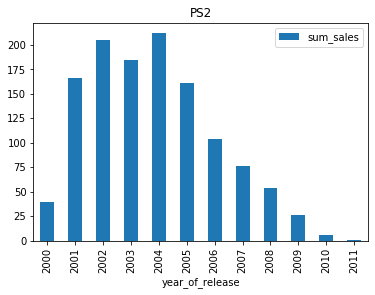

Год старта продаж: 2000
Год финиша продаж: 2011



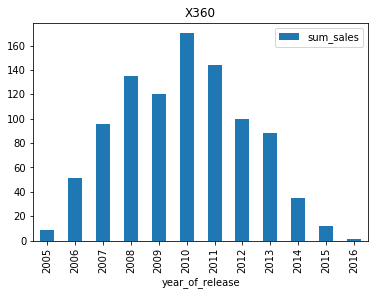

Год старта продаж: 2005
Год финиша продаж: 2016



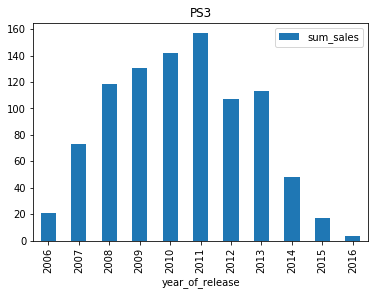

Год старта продаж: 2006
Год финиша продаж: 2016



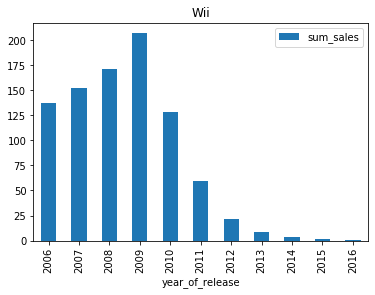

Год старта продаж: 2006
Год финиша продаж: 2016



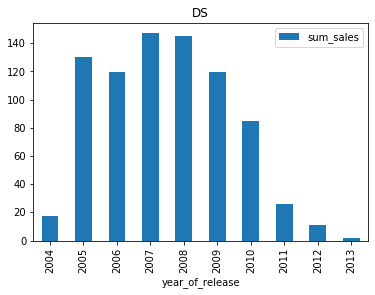

Год старта продаж: 2004
Год финиша продаж: 2013

Медианное кол-во лет существования: 10.0


In [38]:
# Let's build charts of the top 5 platforms by year. We also calculate the lifetime of each platform

time_in_year = [] # lifetime of each platform in years

for name_platform in top_list:
    
    plot_table = table.query('platform == @name_platform')
    plot_table.plot(x='year_of_release', y='sum_sales', kind='bar', title=name_platform)
    plt.show()
    print('Sales start year:', plot_table['year_of_release'].min())
    print('Sales end year:', plot_table['year_of_release'].max())
    time_in_year.append(plot_table['year_of_release'].max() - plot_table['year_of_release'].min())
    print()
    
print('Median number of years of existence:', np.median(time_in_year))    

<code style="background:black;color:violet">So the current period is **2007 to 2016** </code>

## Exploring gaming platforms

In [39]:
# Get a table with the current period

table_actual = table.query('year_of_release >= 2007')

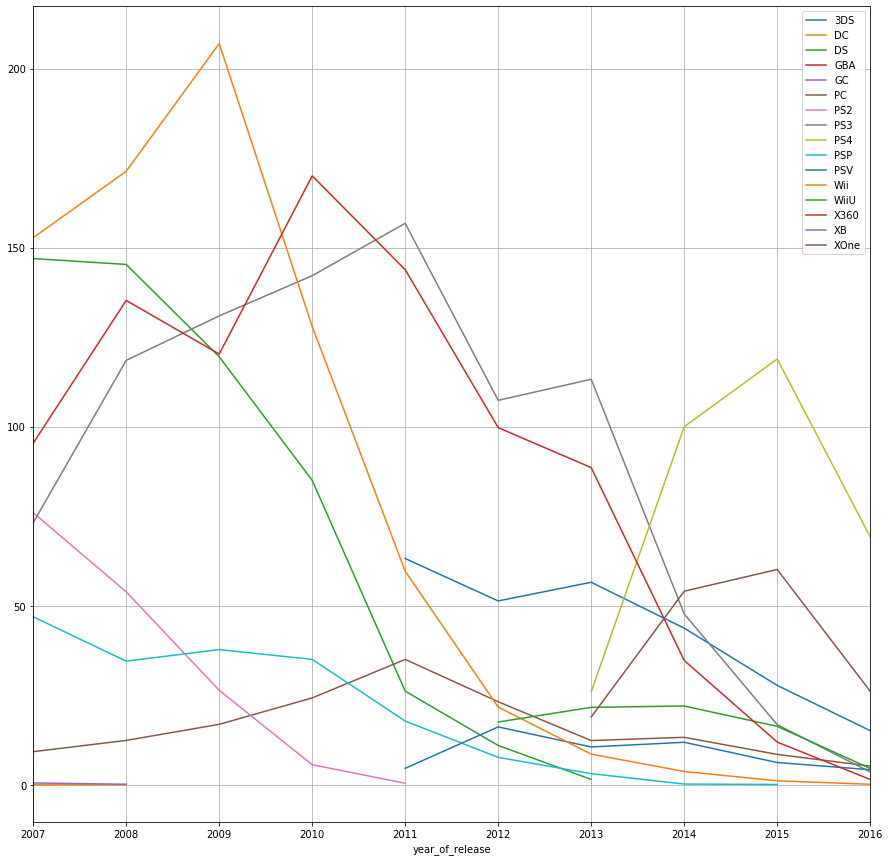

In [40]:
# Explore platforms with charts

ax = plt.show()

for name_platform in table_actual['platform'].unique():  

    plot_table = table_actual.query('platform == @name_platform')
    ax = plot_table.plot(x='year_of_release', y='sum_sales', kind='line', ax = ax, label=name_platform, figsize=(15,15), grid=True, xlim = (2007, 2016))   

<code style="background:black;color:violet">The graph shows that sales are falling, which means a new, more advanced platform should appear soon.
But it should also be taken into account that the data for 2016 is incomplete.</code>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


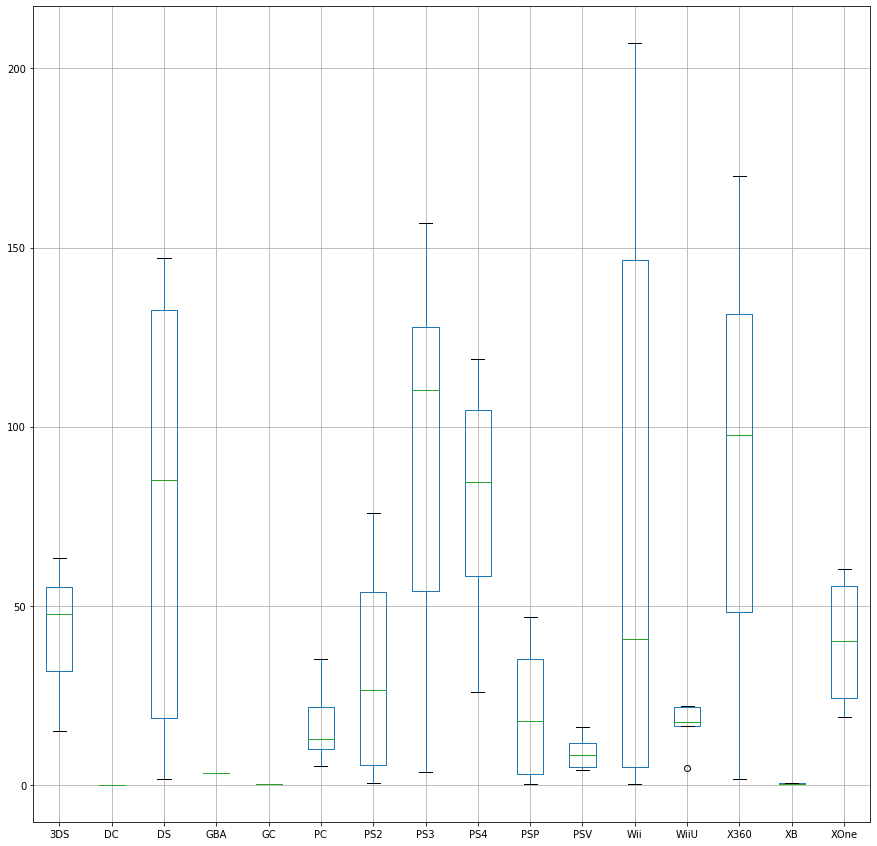

In [41]:
# Rebuild "table_actual" so that platform names become columns

table_actual_for_boxplot = table_actual.pivot_table(index=['year_of_release'], columns=['platform'], values='sum_sales', aggfunc='first')
columns_for_boxplot = table_actual_for_boxplot.columns.tolist()

# Plot a box and whisker plot of global game sales by platform

table_actual_for_boxplot.boxplot(column=columns_for_boxplot, figsize=(15,15), grid=True)

# Plot builds but gives a type error, probably due to the fact that I pass the "columns_for_boxplot" variable as list",
# although I tried to convert to an array, but then it does not work at all

<code style="background:black;color:violet">The spread of sales across platforms is quite large.
Choosing the right platform does not guarantee sales success, but it can help.</code>

## Dependence of global sales on the evaluation of critics and users

In [42]:
# Get a table with the current period. Let's take "PS4" as the platform of consideration,
# because for 2016 it is the most popular

df_actual_PS4 = df.query('year_of_release >= 2007 and platform == "PS4"')

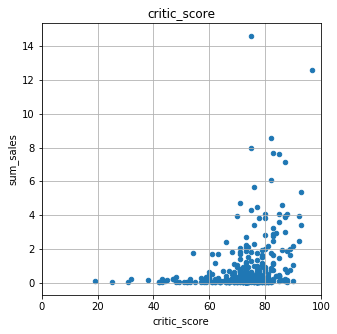

Корреляция между оценкой критиков и глобальными продажами: 0.3091451566202116



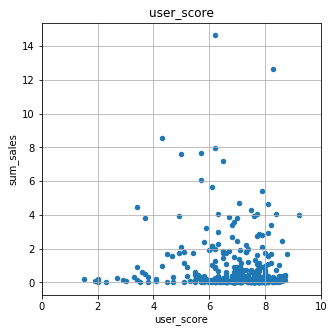

Корреляция между оценкой пользователей и глобальными продажами: -0.07904193454608814


In [43]:
# Let's see how user reviews and critics affect sales

df_actual_PS4.plot(x='critic_score', y='sum_sales', kind='scatter', figsize=(5,5), grid=True, xlim = (0, 100), title='critic_score')
corr_critic = df_actual_PS4['critic_score'].corr(df_actual_PS4['sum_sales'])
plt.show()
print('Correlation between critical score and global sales:', corr_critic)
print()


df_actual_PS4.plot(x='user_score', y='sum_sales', kind='scatter', figsize=(5,5), grid=True, xlim = (0, 10), title='user_score') 
corr_user = df_actual_PS4['user_score'].corr(df_actual_PS4['sum_sales'])
plt.show()
print('Correlation between user rating and global sales:', corr_user)

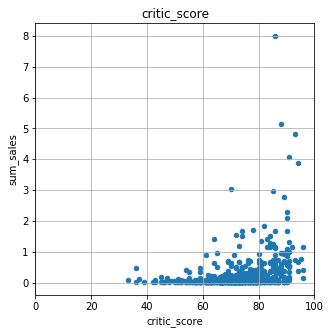

Корреляция между оценкой критиков и глобальными продажами: 0.29758600463279



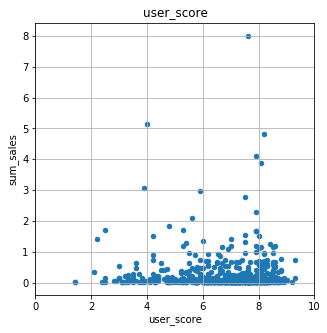

Корреляция между оценкой пользователей и глобальными продажами: -0.024349694887769776


In [44]:
# Check output also for "PC" and "Xbox One" platforms

# "PC"

df_actual_PC = df.query('year_of_release >= 2007 and platform == "PC"')

df_actual_PC.plot(x='critic_score', y='sum_sales', kind='scatter', figsize=(5,5), grid=True, xlim = (0, 100), title='critic_score')
corr_critic = df_actual_PC['critic_score'].corr(df_actual_PC['sum_sales'])
plt.show()
print('Correlation between critical score and global sales:', corr_critic)
print()


df_actual_PC.plot(x='user_score', y='sum_sales', kind='scatter', figsize=(5,5), grid=True, xlim = (0, 10), title='user_score') 
corr_user = df_actual_PC['user_score'].corr(df_actual_PC['sum_sales'])
plt.show()
print('Correlation between user rating and global sales:', corr_user)

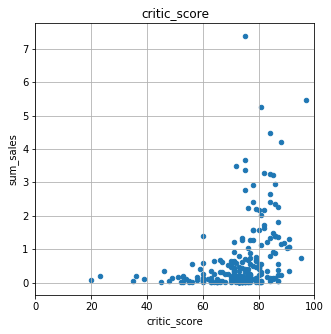

Корреляция между оценкой критиков и глобальными продажами: 0.3439241432183102



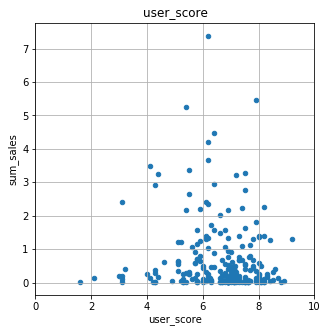

Корреляция между оценкой пользователей и глобальными продажами: -0.09754569172484923


In [45]:
# "Xbox One"

df_actual_XOne = df.query('year_of_release >= 2007 and platform == "XOne"')

df_actual_XOne.plot(x='critic_score', y='sum_sales', kind='scatter', figsize=(5,5), grid=True, xlim = (0, 100), title='critic_score')
corr_critic = df_actual_XOne['critic_score'].corr(df_actual_XOne['sum_sales'])
plt.show()
print('Correlation between critical score and global sales:', corr_critic)
print()


df_actual_XOne.plot(x='user_score', y='sum_sales', kind='scatter', figsize=(5,5), grid=True, xlim = (0, 10), title='user_score') 
corr_user = df_actual_XOne['user_score'].corr(df_actual_XOne['sum_sales'])
plt.show()
print('Correlation between user rating and global sales:', corr_user)

<code style="background:black;color:violet">Based on the critics' assessment, we can indirectly infer what global sales might be.
There is a correlation, but not very strong.</code>

## Distribution of profits by genre

In [46]:
# Get a table with the current period

df_actual = df.query('year_of_release >= 2007')

# Profitability of games by genre

table_actual_genres = df_actual.pivot_table(index='genre', values='sum_sales', aggfunc={'sum', 'count'})
table_actual_genres['ratio_sum/count'] = table_actual_genres['sum'] / table_actual_genres['count']
display(table_actual_genres.sort_values(by='ratio_sum/count', ascending=False))

,count,sum,ratio_sum/count
genre,,,
Shooter,668,678.80,1.016168
Platform,286,230.45,0.805769
Sports,1124,658.07,0.585472
Racing,487,265.19,0.544538
Role-Playing,886,465.03,0.524865
Action,2198,1050.59,0.477975
Fighting,358,166.00,0.463687
Misc,1145,487.89,0.426105
Simulation,549,199.13,0.362714


<code style="background:black;color:violet">The top-grossing genre is **Shooter**, followed by **Platform** and **Sports**.
The lowest selling genre is **Adventure**. </code>

# User portrait of each region (NA, EU, JP)

## NA

### Most popular platforms (top 5)

In [47]:
df_actual_p_t_platform_na = df_actual.pivot_table(index='platform', values='na_sales', aggfunc={'sum'})
df_actual_p_t_platform_na['part'] = df_actual_p_t_platform_na['sum'] / df_actual_p_t_platform_na['sum'].sum()
print(df_actual_p_t_platform_na.sort_values(by='sum', ascending=False).head(5))

             sum      part
platform                  
X360      553.68  0.260612
Wii       416.01  0.195812
PS3       381.29  0.179469
DS        273.98  0.128960
PS4       108.74  0.051183


### Most popular genres (top 5)

In [48]:
df_actual_p_t_genre_na = df_actual.pivot_table(index='genre', values='na_sales', aggfunc={'sum'})
df_actual_p_t_genre_na['part'] = df_actual_p_t_genre_na['sum'] / df_actual_p_t_genre_na['sum'].sum()
print(df_actual_p_t_genre_na.sort_values(by='sum', ascending=False).head(5))

                 sum      part
genre                         
Action        492.17  0.231660
Shooter       350.11  0.164793
Sports        323.86  0.152438
Misc          259.16  0.121984
Role-Playing  175.41  0.082564


### Impact of ESRB rating on sales

In [49]:
df_actual.pivot_table(index='rating', values='na_sales', aggfunc={'sum'}).sort_values(by='sum', ascending=False)

,sum
rating,
E,663.99
M,546.55
T,371.32
E10+,287.61
EC,1.32
RP,0.00


<code style="background:black;color:violet">Based on the critics' assessment, we can indirectly infer what global sales might be.
There is a correlation, but not very strong.</code>

## EU

### Most popular platforms (top 5)

In [50]:
df_actual_p_t_platform_eu = df_actual.pivot_table(index='platform', values='eu_sales', aggfunc={'sum'})
df_actual_p_t_platform_eu['part'] = df_actual_p_t_platform_eu['sum'] / df_actual_p_t_platform_eu['sum'].sum()
print(df_actual_p_t_platform_eu.sort_values(by='sum', ascending=False).head(5))

             sum      part
platform                  
PS3       319.83  0.233777
X360      257.05  0.187888
Wii       214.70  0.156933
PS4       141.09  0.103128
DS        119.92  0.087654


### Most popular genres (top 5)

In [51]:
df_actual_p_t_genre_eu = df_actual.pivot_table(index='genre', values='eu_sales', aggfunc={'sum'})
df_actual_p_t_genre_eu['part'] = df_actual_p_t_genre_eu['sum'] / df_actual_p_t_genre_eu['sum'].sum()
print(df_actual_p_t_genre_eu.sort_values(by='sum', ascending=False).head(5))

            sum      part
genre                    
Action   335.67  0.245355
Shooter  230.16  0.168233
Sports   211.49  0.154587
Misc     127.62  0.093283
Racing   104.63  0.076478


### Impact of ESRB rating on sales

In [52]:
df_actual.pivot_table(index='rating', values='eu_sales', aggfunc={'sum'}).sort_values(by='sum', ascending=False)

,sum
rating,
E,393.08
M,385.86
T,217.89
E10+,162.74
RP,0.03
EC,0.00


<code style="background:black;color:violet">The most commercially successful games in Europe on the platform **Play Station 3**, **Action** genre, rated **E**.</code>

## JP

### Most popular platforms (top 5)

In [53]:
df_actual_p_t_platform_jp = df_actual.pivot_table(index='platform', values='jp_sales', aggfunc={'sum'})
df_actual_p_t_platform_jp['part'] = df_actual_p_t_platform_jp['sum'] / df_actual_p_t_platform_jp['sum'].sum()
print(df_actual_p_t_platform_jp.sort_values(by='sum', ascending=False).head(5))

             sum      part
platform                  
DS        102.93  0.211108
3DS       100.62  0.206370
PS3        78.33  0.160654
PSP        66.24  0.135857
Wii        59.13  0.121275


### Most popular genres (top 5)

In [54]:
df_actual_p_t_genre_jp = df_actual.pivot_table(index='genre', values='jp_sales', aggfunc={'sum'})
df_actual_p_t_genre_jp['part'] = df_actual_p_t_genre_jp['sum'] / df_actual_p_t_genre_jp['sum'].sum()
print(df_actual_p_t_genre_jp.sort_values(by='sum', ascending=False).head(5))

                 sum      part
genre                         
Role-Playing  150.55  0.308776
Action         96.29  0.197490
Misc           48.79  0.100068
Sports         40.28  0.082614
Adventure      26.91  0.055192


### Impact of ESRB rating on sales

In [55]:
df_actual.pivot_table(index='rating', values='jp_sales', aggfunc={'sum'}).sort_values(by='sum', ascending=False)

,sum
rating,
E,95.06
T,74.74
M,41.09
E10+,31.91
EC,0.00
RP,0.00


<code style="background:black;color:violet">Japan's Most Commercially Successful **Nintendo DS** **Role-Playing** Games Rated **E**.</code>

# Testing hypotheses

## Average user ratings for Xbox One and PC platforms are the same

### Null hypothesis

Average user ratings for `Xbox One` and `PC` platforms are the same

### Alternative

Average user ratings for `Xbox One` and `PC` platforms are NOT the same

### Вычисление

In [56]:
alpha = 0.01 # Since the sample is quite large, we choose a smaller level of statistical significance

df_actual_user_score_xbox_one = df_actual.query('platform == "XOne"')['user_score']
df_actual_user_score_pc = df_actual.query('platform == "PC"')['user_score']

results = st.ttest_ind(
    df_actual_user_score_xbox_one, 
    df_actual_user_score_pc)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Rejecting the null hypothesis")

p-значение:  0.04124776986768806
Не получилось отвергнуть нулевую гипотезу


<code style="background:black;color:violet">The null hypothesis was not rejected, which means that there are no significant differences between the samples.</code>

## Average user ratings for Action and Sports are different

### Null hypothesis

Average user ratings for `Action` and `Sports` genres are the same

### Alternative

Average user ratings for `Action` and `Sports` genres are NOT the same

### Calculation

In [57]:
alpha = 0.01 # Since the sample is quite large, we choose a smaller level of statistical significance

df_actual_user_score_action = df_actual.query('genre == "Action"')['user_score']
df_actual_user_score_sports = df_actual.query('genre == "Sports"')['user_score']

results = st.ttest_ind(
    df_actual_user_score_action, 
    df_actual_user_score_sports)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-значение:  2.2796645802316827e-19
Отвергаем нулевую гипотезу


<code style="background:black;color:violet">Average user rating for the **Action** genre is not equal to the average user rating for the **Sports** genre. </code>

# Conclusion

To plan an advertising company, first of all, you need to find out what region of sale we are talking about. <br />
Next, you need to clarify the genre of the game, platform and age rating. <br />
After that, it is necessary to find out the assessment of critics, since it indirectly affects sales. <br />

For example, during the study, the following was found: <br />
<br />
In North America, an `Action` or `Shooter` game on the `Xbox 360` platform with an `E` or `Mature 17+` rating will be a commercial success.
<br />
In Europe, a game on the `Play Station 3` platform of the `Action` or `Shooter` genre with an `E` or `Mature 17+` rating will be a commercial success.
<br />
In Japan, a game on the `Nintendo DS` platform of the `Role-Playing` or `Action` genre with an `E` or `Mature 17+` rating will be a commercial success.
<br />
<br />
If you need to be successful all over the world, then you should make a game in the `Shooter` genre on the `Play Station 4` platform.